In [ ]:
!pip install tensorflow==2.9.1
import tensorflow as tf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

In [ ]:
import seaborn as sns
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchsummary import summary
import tensorflow as ts
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


## downloading the dataset

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#we are downloading the dataset from kaggle

import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dohametwallysalah
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [01:08<00:00, 42.4MB/s]


In [ ]:
import os

print('Training Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Training Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
There are 0 directories,1722 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
There are 0 directories,1824 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy
There are 0 directories,1838 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot
There are 0 directories,1826 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy
There are 0 directories,1913 images in /content/new-plant-diseases-dataset/New Plant

In [ ]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Testing Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
There are 0 directories,430 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
There are 0 directories,456 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___healthy
There are 0 directories,459 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___Bacterial_spot
There are 0 directories,456 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Cherry_(including_sour)___healthy
There are 0 directories,478 images in /content/new-plant-diseases-dataset/New Plant Disea

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data =keras.utils.image_dataset_from_directory(train_dir ,
                                         image_size=(256, 256))
valid_data = keras.utils.image_dataset_from_directory(test_dir,
                                        image_size=(256, 256))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
train_data,valid_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
diseases = os.listdir(train_dir)
print(diseases)
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1
print("======================================================================")
print(f'Number of different types of plants in our dataset is {str(len(plants))}')
print(f'Total number of Diseases in our dataset are {NumberOfDiseases}')

['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___healthy', 'Peach___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Pepper,_bell___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Pepper,_bell___healthy', 'Strawberry___Leaf_scorch', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Late_blight', 'Soybean___healthy', 'Apple___Apple_scab', 'Corn_(maize)___Common_rust_', 'Tomato___Tomato_mosaic_virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Early_blight', 'Corn_(maize)___healthy', 'Squash___Powdery_mildew', 'Peach___healthy', 'Tomato___Leaf_Mold', 'Blueberry___healthy', 'Tomato___healthy', 'Strawberry___healthy', 'Apple___Black_rot', 'Potato___Early_blight', 'Raspberry___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape_

In [ ]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Grape', 'Potato', 'Peach', 'Cherry_(including_sour)', 'Pepper,_bell', 'Apple', 'Tomato', 'Strawberry', 'Soybean', 'Corn_(maize)', 'Orange', 'Squash', 'Blueberry', 'Raspberry']


In [ ]:
nums_train = {}
nums_val = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))
    nums_val[disease] = len(os.listdir(test_dir + '/' + disease))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


no. of images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Potato___healthy                                             1824
Peach___Bacterial_spot                                       1838
Cherry_(including_sour)___healthy                            1826
Pepper,_bell___Bacterial_spot                                1913
Apple___Cedar_apple_rust                                     1760
Tomato___Bacterial_spot                                      1702
Pepper,_bell___healthy                                       1988
Strawberry___Leaf_scorch                                     1774
Apple___healthy                                              2008
Cherry_(including_sour)___Powdery_mildew                     1683
Tomato___Late_blight                                         1851
Soybean___healthy                                            2022
Apple___Apple_scab                                           2016
Corn_(maize)___Common_rust_                                  1907
Tomato___Tomato_mosaic_virus                                 1790
Orange___Haunglongbing_(Citrus_greening)                     2010
Corn_(maize)___Northern_Leaf_Blight                          1908
Potato___Late_blight                                         1939
Grape___Esca_(Black_Measles)                                 1920
Tomato___Early_blight                                        1920
Corn_(maize)___healthy                                       1859
Squash___Powdery_mildew                                      1736
Peach___healthy                                              1728
Tomato___Leaf_Mold                                           1882
Blueberry___healthy                                          1816
Tomato___healthy                                             1926
Strawberry___healthy                                         1824
Apple___Black_rot                                            1987
Potato___Early_blight                                        1939
Raspberry___healthy                                          1781
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Tomato___Septoria_leaf_spot                                  1745
Tomato___Spider_mites Two-spotted_spider_mite                1741
Grape___Black_rot                                            1888
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Grape___healthy                                              1692
Tomato___Target_Spot                                         1827

<Axes: title={'center': 'Train data distribution '}, xlabel='Number of image', ylabel='Planet'>

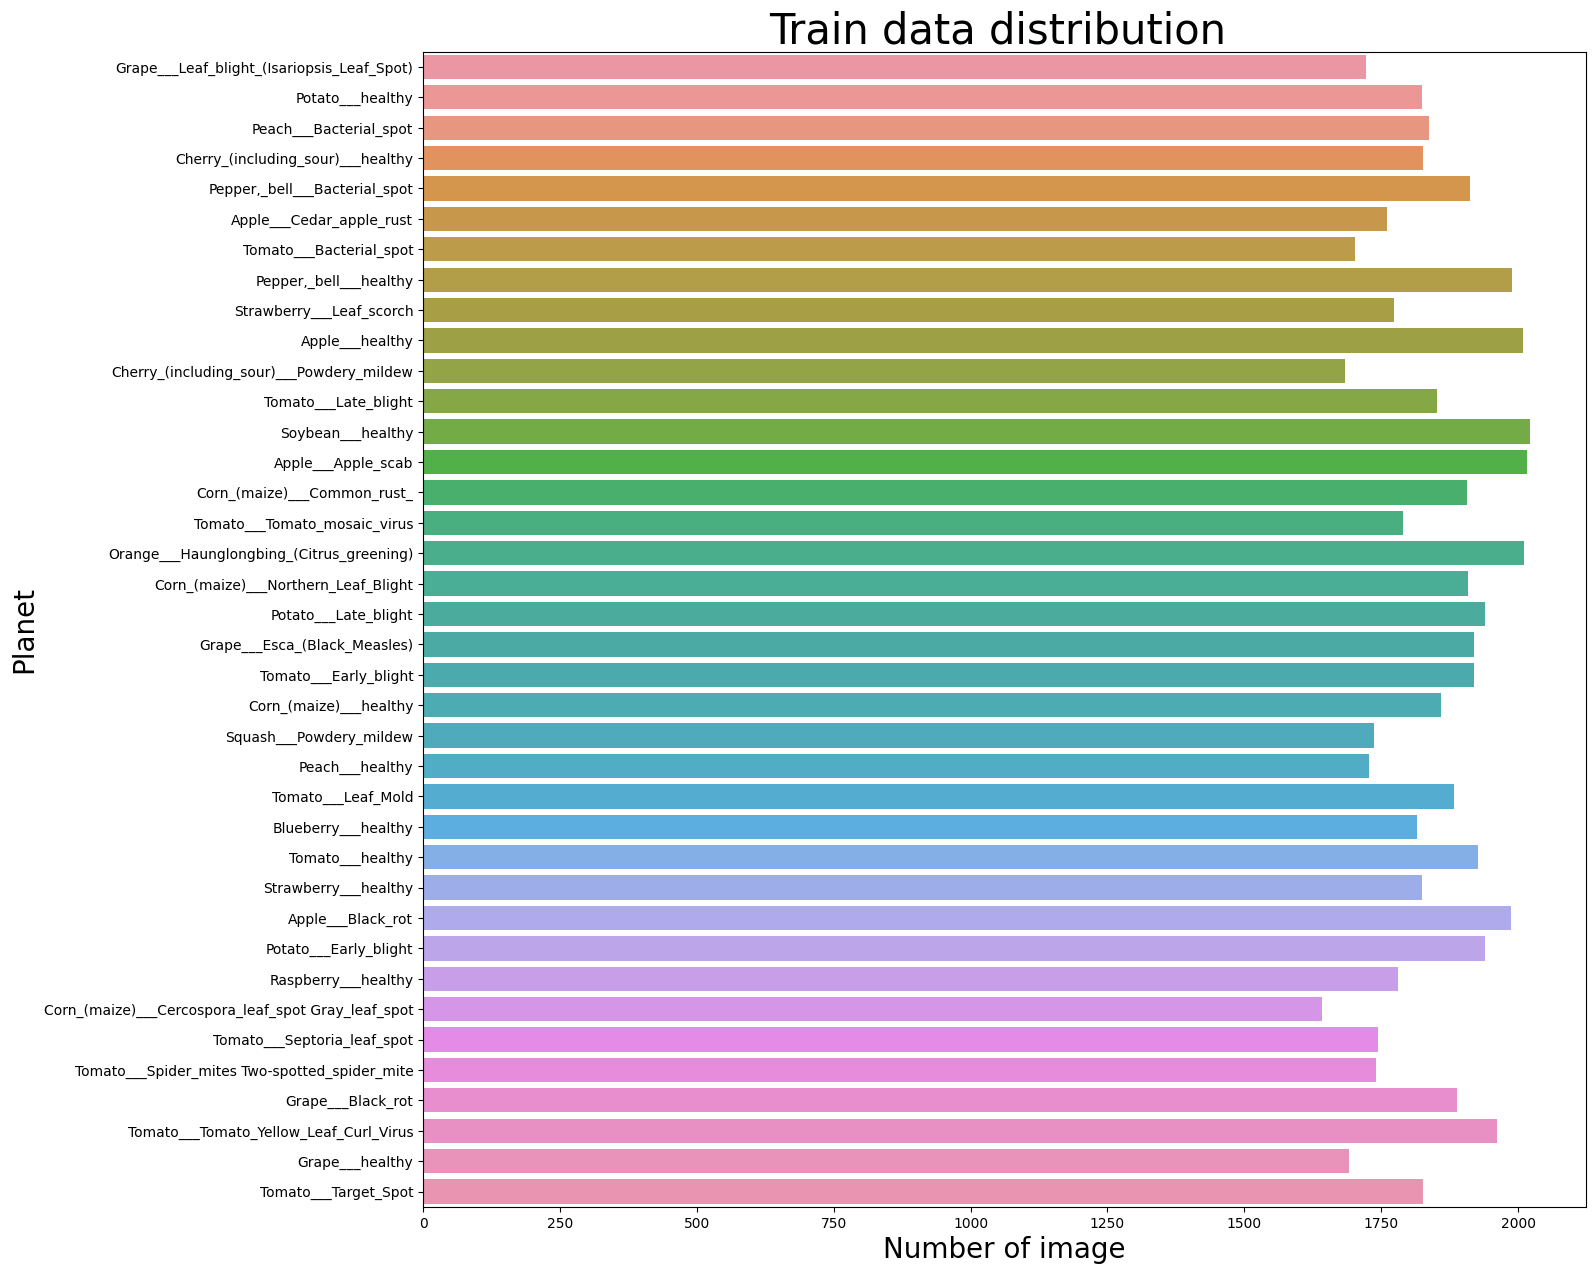

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(nums_train.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_train.values())
sns.barplot(y=keys, x=vals)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

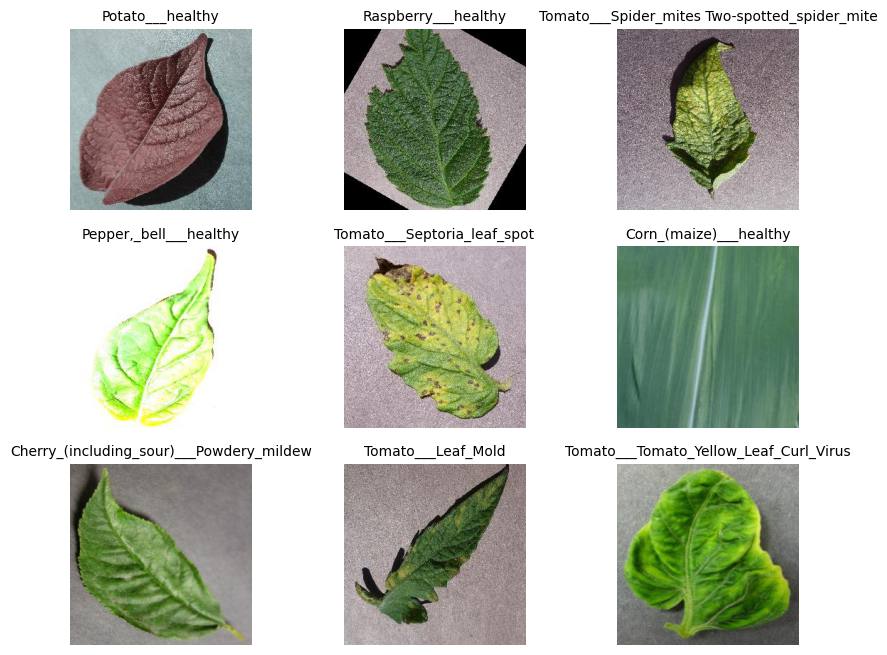

In [ ]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

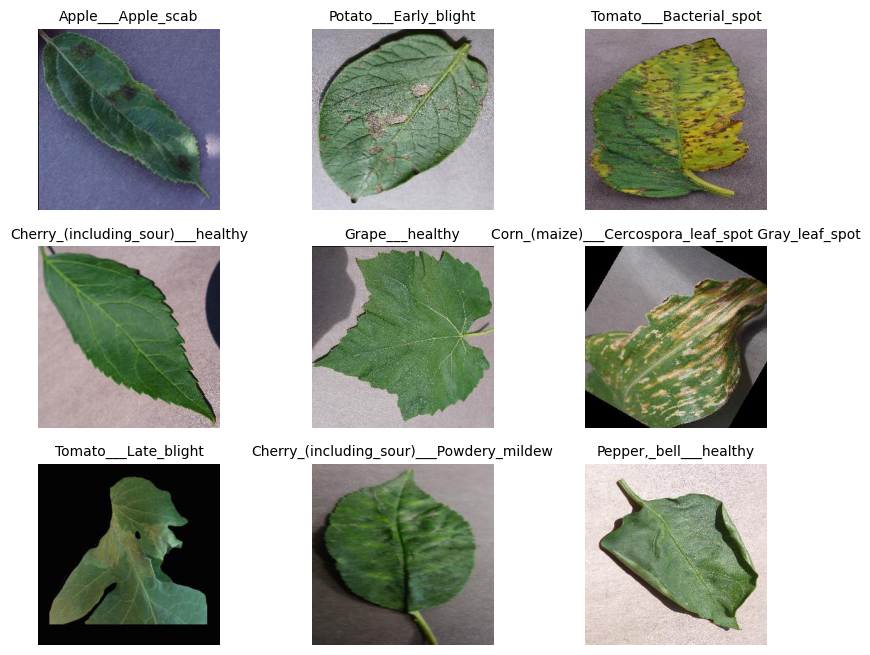

In [ ]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(test_dir)

In [ ]:
rescale = keras.layers.Rescaling(scale=1.0/255)

In [ ]:
train_gen = train_data.map(lambda image,label:(rescale(image),label))
valid_gen  = valid_data.map(lambda image,label:(rescale(image),label))

In [ ]:
model_1 = keras.models.Sequential()

model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)))

model_1.add(keras.layers.Dropout(0.1))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.15))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(128, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(256, activation='relu'))
model_1.add(keras.layers.Dense(38, activation='softmax'))

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 dropout (Dropout)           (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
history = model_1.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

Epoch 1/10


<ipython-input-37-a06cfbdb2b30>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_1.fit_generator(train_gen,


2197/2197 [==============================] - 280s 122ms/step - loss: 0.7928 - accuracy: 0.7629 - val_loss: 0.4122 - val_accuracy: 0.8725
Epoch 2/10
2197/2197 [==============================] - 262s 119ms/step - loss: 0.2107 - accuracy: 0.9324 - val_loss: 0.2838 - val_accuracy: 0.9089
Epoch 3/10
2197/2197 [==============================] - 260s 118ms/step - loss: 0.1198 - accuracy: 0.9603 - val_loss: 0.3085 - val_accuracy: 0.9091
Epoch 4/10
2197/2197 [==============================] - 263s 120ms/step - loss: 0.1020 - accuracy: 0.9677 - val_loss: 0.3580 - val_accuracy: 0.8963
Epoch 5/10
2197/2197 [==============================] - 260s 118ms/step - loss: 0.0710 - accuracy: 0.9783 - val_loss: 0.3062 - val_accuracy: 0.9155
Epoch 6/10
2197/2197 [==============================] - 259s 118ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.3810 - val_accuracy: 0.9076
Epoch 7/10
2197/2197 [==============================] - 260s 118ms/step - loss: 0.0589 - accuracy: 0.9823 - val_loss: 0.350

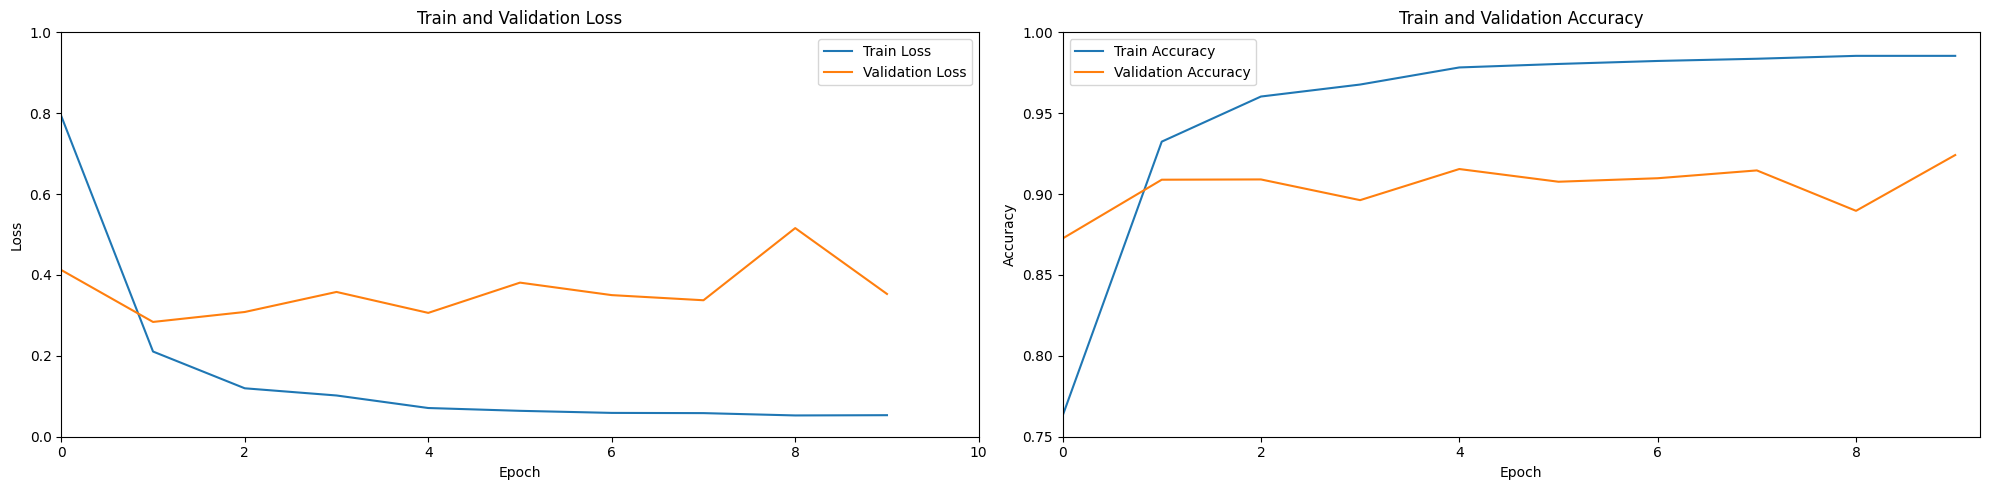

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_1.predict(x),1).numpy())

1/1 [==============================] - 0s 91ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Loss Function   : {:.4f}".format(history.history['loss'][-1]))
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.55 %
Test Accuracy   : 92.41 %
Precision Score : 92.41 %
Recall Score    : 92.41 %


## Model_2

In [ ]:
model_2 = keras.Sequential()

model_2.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model_2.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model_2.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model_2.add(keras.layers.Flatten())

model_2.add(keras.layers.Dense(1568,activation="relu"))
model_2.add(keras.layers.Dropout(0.5))

model_2.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                  

In [ ]:
history = model_2.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

Epoch 1/10


<ipython-input-45-21bf19100c99>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_2.fit_generator(train_gen,


2197/2197 [==============================] - 384s 173ms/step - loss: 1.7086 - accuracy: 0.5036 - val_loss: 0.5289 - val_accuracy: 0.8358
Epoch 2/10
2197/2197 [==============================] - 378s 172ms/step - loss: 0.4461 - accuracy: 0.8560 - val_loss: 0.3186 - val_accuracy: 0.8931
Epoch 3/10
2197/2197 [==============================] - 377s 172ms/step - loss: 0.2694 - accuracy: 0.9122 - val_loss: 0.1984 - val_accuracy: 0.9338
Epoch 4/10
2197/2197 [==============================] - 378s 172ms/step - loss: 0.1848 - accuracy: 0.9384 - val_loss: 0.1919 - val_accuracy: 0.9389
Epoch 5/10
2197/2197 [==============================] - 378s 172ms/step - loss: 0.1412 - accuracy: 0.9525 - val_loss: 0.1803 - val_accuracy: 0.9425
Epoch 6/10
2197/2197 [==============================] - 378s 172ms/step - loss: 0.1058 - accuracy: 0.9645 - val_loss: 0.1299 - val_accuracy: 0.9573
Epoch 7/10
2197/2197 [==============================] - 378s 172ms/step - loss: 0.0911 - accuracy: 0.9699 - val_loss: 0.113

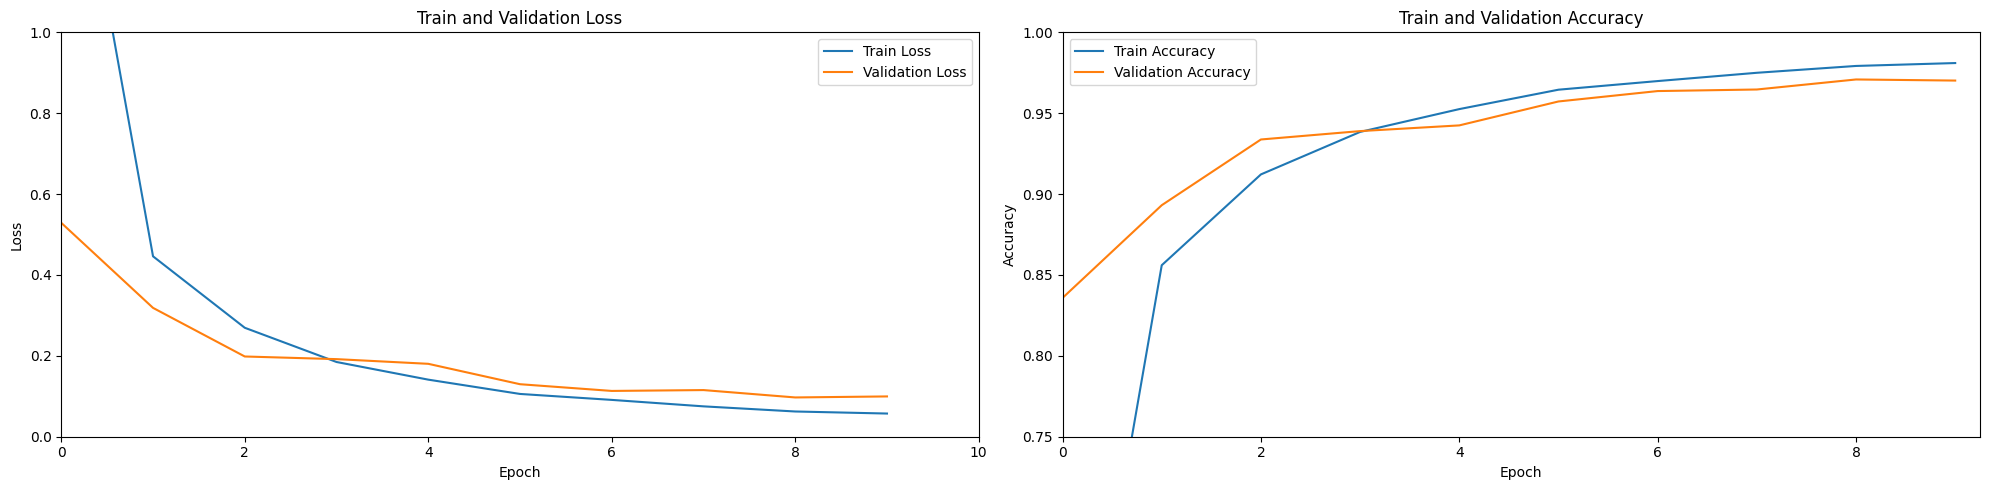

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_2.predict(x),1).numpy())

1/1 [==============================] - 0s 179ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Loss Function   : {:.4f}".format(history.history['loss'][-1]))
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Loss Function   : 0.0573
Train Accuracy  : 98.10 %
Test Accuracy   : 97.02 %
Precision Score : 97.02 %
Recall Score    : 97.02 %


In [ ]:
train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

base_model = tf.keras.applications.ResNet50(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')



In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:
feature_model.summary()


Model: "plant_disease_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 GlobalAveragePooling2D_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 38)                77862     
                                                                 
Total params: 23,665,574
Trainable params: 9,009,190
Non-trainable params: 14,656,384
_________________________________________________________________


In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")


In [ ]:
initial_epochs = 10

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'ResNet50')])


Saving TensorBoard log files to: plant_disease_model/ResNet50/20230615-192308
Epoch 1/10
2197/2197 [==============================] - 379s 166ms/step - loss: 0.1634 - accuracy: 0.9489 - val_loss: 0.1141 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 2/10
2197/2197 [==============================] - 357s 163ms/step - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.0521 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 3/10
2197/2197 [==============================] - 358s 163ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0339 - val_accuracy: 0.9892 - lr: 0.0010
Epoch 4/10
2197/2197 [==============================] - 329s 149ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0346 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 5/10
2197/2197 [==============================] - 330s 150ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0233 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 6/10
2197/2197 [==============================] - 330s 150ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss:

In [ ]:
feature_model.load_weights(checkpoint_path)


In [ ]:
feature_model.evaluate(test_data)


550/550 [==============================] - 57s 103ms/step - loss: 0.0120 - accuracy: 0.9969


[0.0120445117354393, 0.9968700408935547]

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = history1.epoch

  acc = history.history['accuracy']
  val_acc =history.history['val_accuracy']

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title('Training_loss vs Validation_loss')

  plt.subplot(2,1,2)
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title('Training_accuracy vs Validation_accuracy')


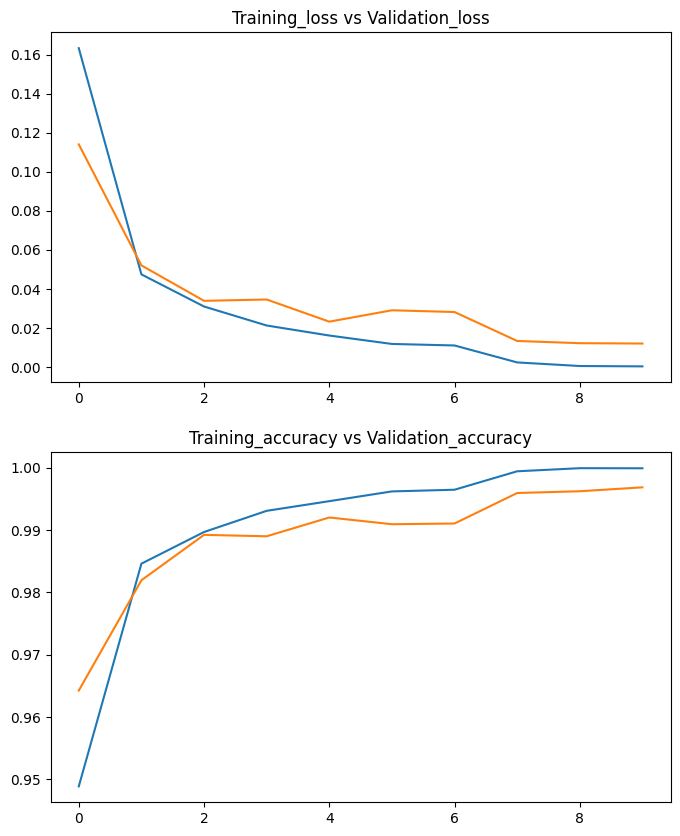

In [ ]:
plot_history(history1)


In [ ]:
# Assuming you have the ground truth labels and predicted labels stored in 'y_true' and 'y_pred' variables respectively

y_true = []
y_pred = []

for images, labels in test_data:
    predictions = feature_model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())



1/1 [==============================] - 1s 840ms/step


In [ ]:
precision = precision_score(y_true, y_pred, average='micro') * 100
recall = recall_score(y_true, y_pred, average='micro') * 100
loss, test_accuracy = feature_model.evaluate(test_data)

print("Precision Score : {:.2f} %".format(precision))
print("Recall Score    : {:.2f} %".format(recall))
print("Loss Function   : {:.4f}".format(loss))


550/550 [==============================] - 58s 104ms/step - loss: 0.0120 - accuracy: 0.9969
Precision Score : 99.69 %
Recall Score    : 99.69 %
Loss Function   : 0.0120


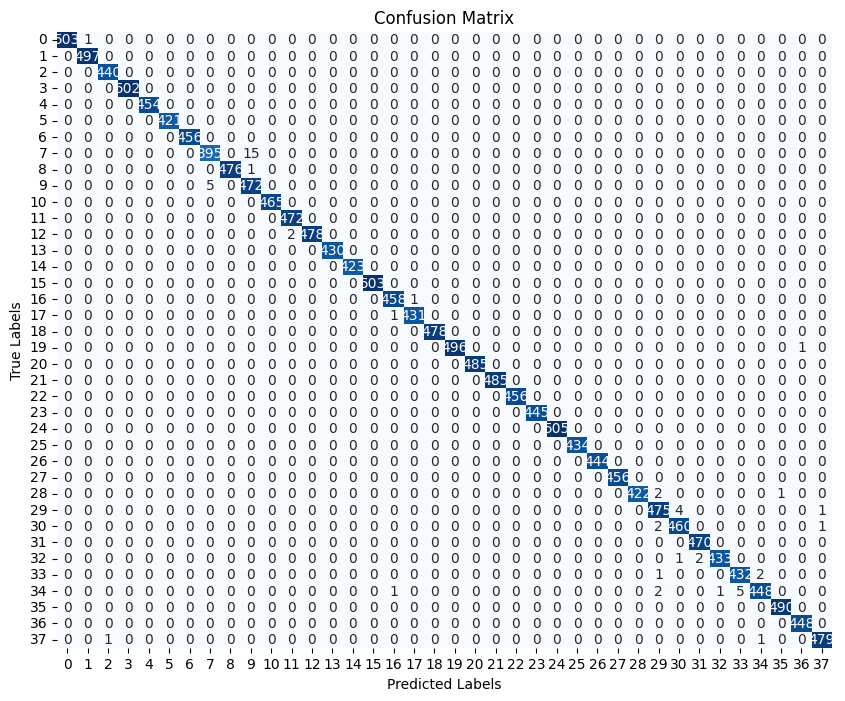

In [ ]:
confusion_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
feature_model.save('best_plant_model.h5')

In [ ]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img

Text(0.5, 0.98, '(224, 224, 3)')

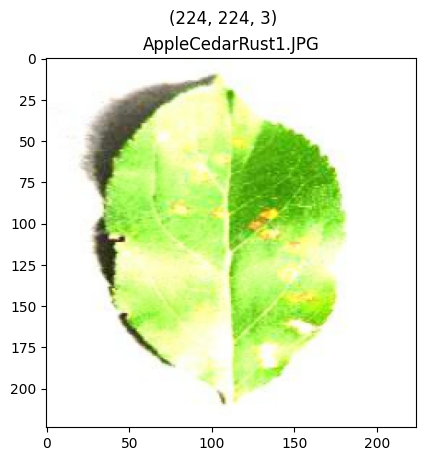

In [ ]:
image = load_prep('/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

In [ ]:
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred


1/1 [==============================] - 0s 453ms/step


array([[9.33799882e-09, 3.62615354e-10, 1.00000000e+00, 3.00387527e-11,
        3.04362069e-09, 1.39744813e-12, 7.16463000e-11, 2.32796204e-12,
        1.06962196e-10, 6.04359956e-15, 4.25417107e-13, 2.69501116e-10,
        9.54882267e-12, 2.54645111e-10, 6.21254825e-10, 3.78441115e-12,
        1.72156031e-13, 1.15360256e-10, 2.98370659e-15, 2.22588337e-11,
        1.48644606e-13, 7.60194177e-16, 4.79701745e-09, 2.65806599e-10,
        6.30261360e-13, 8.43873636e-13, 7.55832688e-11, 3.15187806e-12,
        4.36755344e-19, 6.99248602e-14, 7.63663178e-12, 1.67001426e-16,
        1.85200467e-14, 2.74707211e-16, 3.02025016e-10, 5.44255830e-13,
        8.30315309e-13, 7.13850094e-13]], dtype=float32)

In [ ]:
predicted_value = class_names[pred.argmax()]
predicted_value

'Apple___Cedar_apple_rust'

In [ ]:
class_names = test_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))

  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 41ms/step


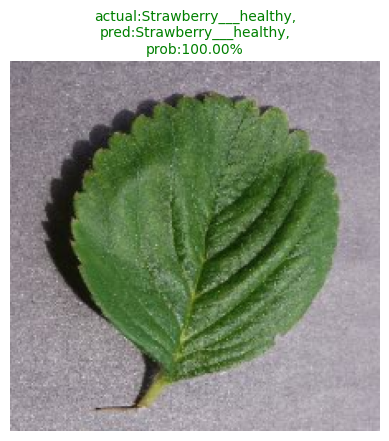

In [ ]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 77ms/step


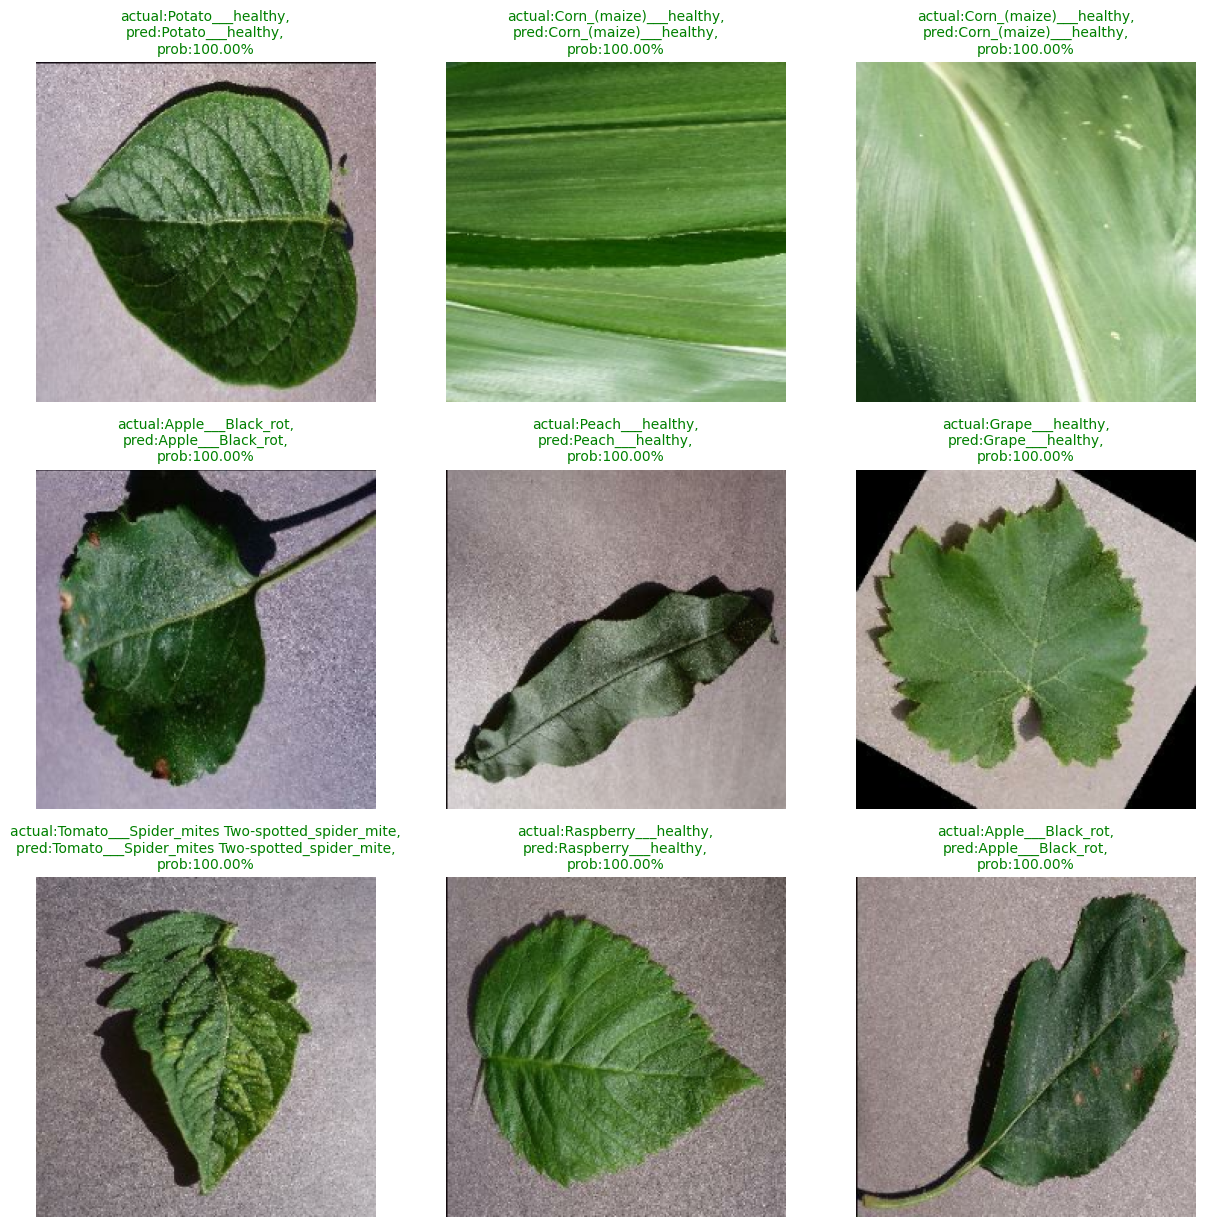

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 26ms/step


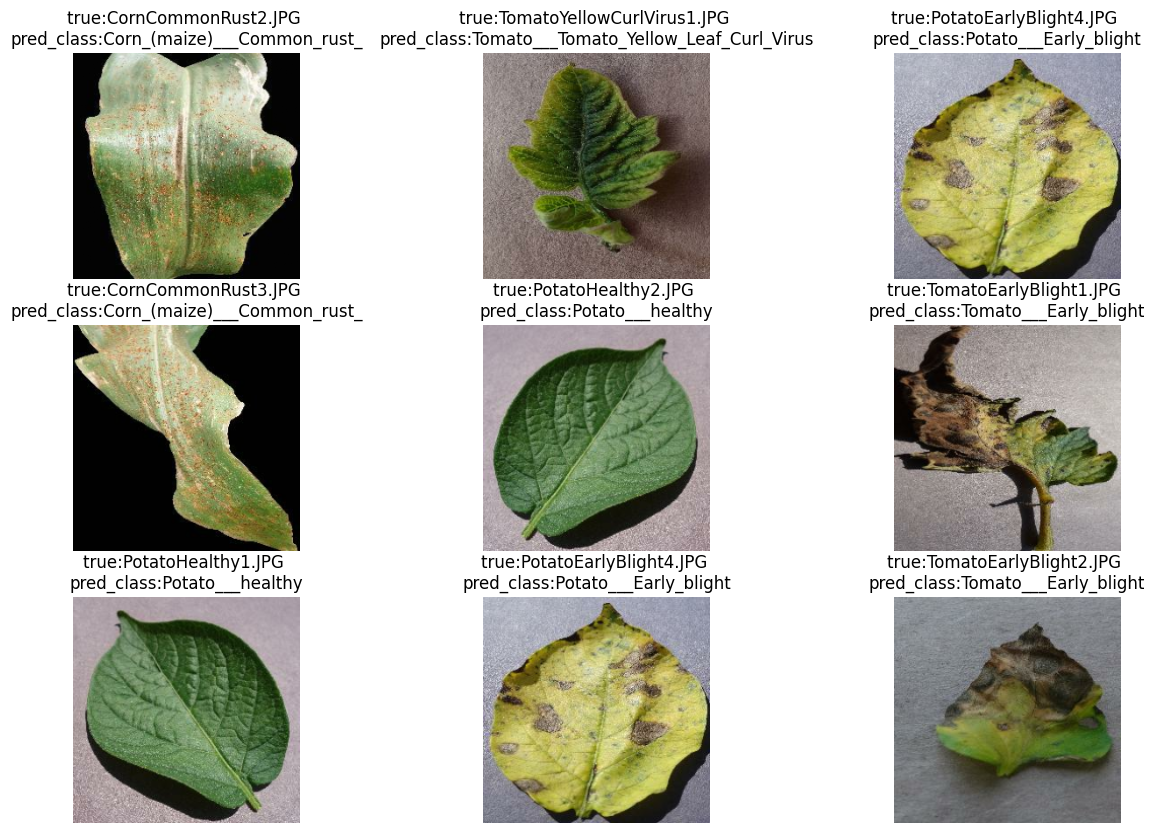

In [ ]:
data_dir='/content/new-plant-diseases-dataset/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)


## lets download some image on google

In [ ]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [ ]:
!wget https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Article%20Images/AppleScab03.jpg

--2023-06-15 20:32:43--  https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Article%20Images/AppleScab03.jpg
Resolving www.apsnet.org (www.apsnet.org)... 3.216.53.172
Connecting to www.apsnet.org (www.apsnet.org)|3.216.53.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30646 (30K) [image/jpeg]
Saving to: ‘AppleScab03.jpg’

AppleScab03.jpg     100%[===================>]  29.93K  --.-KB/s    in 0.09s   

2023-06-15 20:32:44 (345 KB/s) - ‘AppleScab03.jpg’ saved [30646/30646]



1/1 [==============================] - 0s 31ms/step


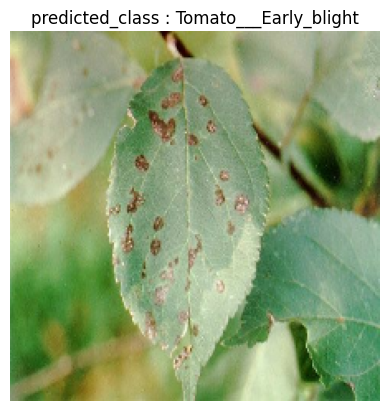

In [ ]:
predict_img('AppleScab03.jpg')

In [ ]:
!wget https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg

--2023-06-15 20:33:17--  https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg
Resolving www.planetnatural.com (www.planetnatural.com)... 104.18.0.2, 104.18.1.2, 2606:4700::6812:102, ...
Connecting to www.planetnatural.com (www.planetnatural.com)|104.18.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99069 (97K) [image/jpeg]
Saving to: ‘potato-blight.jpg’

potato-blight.jpg   100%[===================>]  96.75K  --.-KB/s    in 0.005s  

2023-06-15 20:33:17 (19.5 MB/s) - ‘potato-blight.jpg’ saved [99069/99069]



1/1 [==============================] - 0s 28ms/step


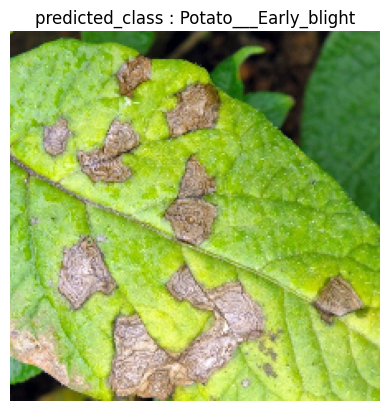

In [ ]:
predict_img('potato-blight.jpg')

In [ ]:
!wget https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg

--2023-06-15 20:33:37--  https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg
Resolving content.peat-cloud.com (content.peat-cloud.com)... 52.222.139.122, 52.222.139.105, 52.222.139.112, ...
Connecting to content.peat-cloud.com (content.peat-cloud.com)|52.222.139.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20361 (20K) [image/jpeg]
Saving to: ‘black-rot-of-grape-grape-1575457334.jpg’

black-rot-of-grape- 100%[===================>]  19.88K  --.-KB/s    in 0.009s  

2023-06-15 20:33:37 (2.21 MB/s) - ‘black-rot-of-grape-grape-1575457334.jpg’ saved [20361/20361]



1/1 [==============================] - 0s 39ms/step


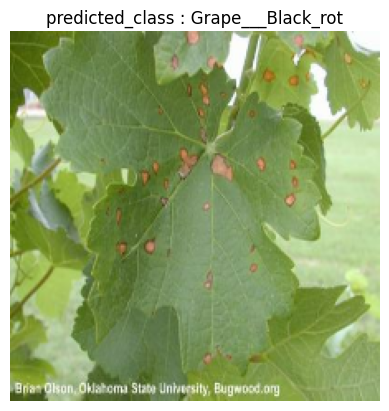

In [ ]:
predict_img('black-rot-of-grape-grape-1575457334.jpg')

In [ ]:
!wget https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg

--2023-06-15 20:33:46--  https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 23.227.60.200
Connecting to cdn.shopify.com (cdn.shopify.com)|23.227.60.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28221 (28K) [image/jpeg]
Saving to: ‘Depositphotos_160089900_l-2015_large.jpg’

Depositphotos_16008 100%[===================>]  27.56K  --.-KB/s    in 0s      

2023-06-15 20:33:46 (81.5 MB/s) - ‘Depositphotos_160089900_l-2015_large.jpg’ saved [28221/28221]



1/1 [==============================] - 0s 26ms/step


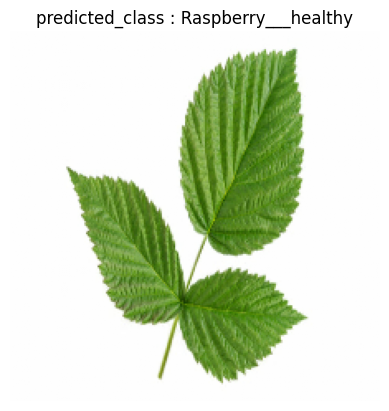

In [ ]:
predict_img('Depositphotos_160089900_l-2015_large.jpg')

In [ ]:
!wget https://www.rosbreed.org/sites/default/files/pm%20cherry%20leaf.jpg

--2023-06-15 20:34:24--  https://www.rosbreed.org/sites/default/files/pm%20cherry%20leaf.jpg
Resolving www.rosbreed.org (www.rosbreed.org)... 134.121.193.83
Connecting to www.rosbreed.org (www.rosbreed.org)|134.121.193.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246531 (241K) [image/jpeg]
Saving to: ‘pm cherry leaf.jpg’

pm cherry leaf.jpg  100%[===================>] 240.75K   406KB/s    in 0.6s    

2023-06-15 20:34:26 (406 KB/s) - ‘pm cherry leaf.jpg’ saved [246531/246531]



1/1 [==============================] - 0s 31ms/step


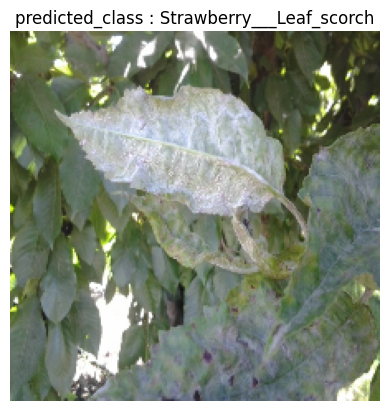

In [ ]:
predict_img('pm cherry leaf.jpg')